In [1]:
from plyfile import PlyData, PlyElement
import numpy as np
import pandas as pd
import pyvista as pv
import sys
import os.path as osp
from matplotlib import pyplot as plt
sys.path.append("./segmentation/cutpursuit/pcd-prox-split/grid-graph/python")
from grid_graph import edge_list_to_forward_star # type: ignore
from segmentation.cutpursuit.python.wrappers.cp_d0_dist import cp_d0_dist



# pcd_fp = "./data/flatLabels/flatLabels_viadukt.ply"
# pcd_fp = "./data/flatLabels/flatLabels_twingen.ply"
pcd_fp = "./data/flatLabels/flatLabels_westbahnhof.ply"
# pcd_fp = "./data/flatLabels/flatLabels_niebelungen.ply"

pcd = pd.DataFrame(PlyData.read(pcd_fp).elements[0].data)





In [2]:
import yaml
with open(osp.join(osp.split(pcd_fp)[0],osp.basename(pcd_fp).replace('.ply','.yaml')),'r') as f:
    label_schema = yaml.safe_load(f)

label_map = {
    'flatLabels_westbahnhof.ply' : 
        np.array([
            [0, 0], #'cable',
            [1, 0], #'concrete_beam',
            [2, 0], #'concrete_cover',
            [3, 1], #'concrete_cover_damaged',
            [4, 0], #'efflorecence',
            [5, 0], #'graffiti',
            [6, 0], #'lamps',
            [7, 0], #'reinforcment',
            [8, 0], #'spalling'
        ]),
    'flatLabels_twingen.ply':
        np.array([
            [0, 0], #'paving',
            [1, 0], #'pier_cap',
            [2, 0], #'pipe',
            [3, 0], #'pipe_fasteners',
            [4, 0], #'railing',
            [5, 0], #'unspecified',
            [6, 0], #'vegetation',
            [7, 0], #'scan_artefact',
            [8, 0], #'road_barrier',
            [9, 0], #'kerbstone',
            [10, 0], #'deck',
            [11, 1], #'roadway',
            [12, 0], #'road_marking',
            [13, 0], #'column',
            [14, 0], #'natural_ground',
        ]),
    'flatLabels_viadukt.ply':
        np.array([
            [0, 0], # concrete
            [1, 1], # brick
        ]),
    'flatLabels_niebelungen.ply':
        np.array([
            [0, 0], # 'addon',
            [1, 0], # 'attatchment',
            [2, 0], # 'beam',
            [3, 1], # 'column',
            [4, 0], # 'deck',
            [5, 0], # 'fundament',
            [6, 0], # 'pipe',
            [7, 0], # 'railing',
            [8, 0], # 'roadway',
            [9, 0], # 'road_barrier',
            [10, 0], # 'road_marking',
            [11, 0], # 'scan_artefact',
        ]),

}
 
 

In [3]:
pcd.columns
field_map = {
    'flatLabels_westbahnhof.ply':{
        'x' : 'x',
        'y' : 'y',
        'z' : 'z',
        'red' : 'red',
        'green' : 'green',
        'blue' : 'blue',
        'riegl_reflectance' : 'riegl_reflectance',
        'riegl_deviation' : 'riegl_deviation',
        'labels' : 'labels',
    },
    'flatLabels_twingen.ply':{
        'x':'x',
        'y':'y',
        'z':'z',
        'red':'red',
        'green':'green',
        'blue':'blue',
        'intensity':'intensity',
        'labels':'labels',
    },
    'flatLabels_viadukt.ply':{
        'x' : 'x',
        'y' : 'y',
        'z' : 'z',
        'red' : 'red',
        'green' : 'green',
        'blue' : 'blue',
        'scalar_material' : 'labels',
    },
    'flatLabels_niebelungen.ply':{
        'x' : 'x',
        'y' : 'y',
        'z' : 'z',
        'red' : 'red',
        'green' : 'green',
        'blue' : 'blue',
        'Intensity' : 'intensity',
        'labels' : 'labels',
    }
}

In [4]:
pcd.columns

Index(['x', 'y', 'z', 'red', 'green', 'blue', 'riegl_reflectance',
       'riegl_deviation', 'labels'],
      dtype='object')

In [5]:
# load and remap fields

pos = pcd[['x','y','z']].to_numpy().astype(np.float32)
rgb = pcd[['red','green','blue']].to_numpy().astype(np.float32) if 'red' in pcd.columns else np.zeros((pos.shape[0],3), np.float32)
intensity = pcd['intensity'].to_numpy().astype(np.float32) if 'intensity' in pcd.columns else np.zeros(pos.shape[0], np.float32)
label = pcd['labels'].to_numpy().astype(int) if 'labels' in pcd.columns else pcd['scalar_material'].to_numpy().astype(int)

fn = osp.basename(pcd_fp)
# remap labels
label_bin = label_map[fn][:,1][label]

# Camera

In [6]:
# reset camera_positions dict

camera_positions = dict()

In [7]:
# load camera positions dict
import pickle
with open('./data/flatLabels/camera_positions.pkl','rb') as f:
    camera_positions = pickle.load(f)

In [8]:
# # capture camera position in a dict
# import os.path as osp
# current_camera_position = plotter.camera_position
# camera_positions[osp.basename(pcd_fp)] = current_camera_position


In [9]:
# # save camera_pos_dict
# import pickle
# with open('./data/flatLabels/camera_positions.pkl','wb') as f:
#     pickle.dump(camera_positions, f)

In [10]:
# reset camera position
def reset_camera_standard(plotter:pv.Plotter):
    standard_view = camera_positions[osp.basename(pcd_fp)]
    plotter.camera_position = standard_view
    plotter.render()


In [11]:
# visualize loaded file

plotter = pv.Plotter(notebook=True)
pcd_poly = pv.PolyData(pos)
pcd_poly['RGB']=rgb
pcd_poly['label_bin']=label_bin
# plotter.add_mesh(pcd_poly,scalars='RGB',rgb=True)
plotter.add_mesh(pcd_poly,scalars='label_bin')
plotter.show(jupyter_backend='trame')
reset_camera_standard(plotter)

Widget(value='<iframe src="http://localhost:63566/index.html?ui=P_0x22ec0bd9790_0&reconnect=auto" class="pyvis…

 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions
 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions
 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions
 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions
 JS Error => error: Uncaught TypeError: Cannot mix BigInt and other types, use explicit conversions


# Segmentation

In [12]:
from segmentation.interactive_gc import scatter_eig
from torch_geometric.nn import knn_graph
from typing import Optional, Tuple
from torch_scatter import scatter_add
import torch
@torch.no_grad()
def scatter_eigendecomposition(src:torch.Tensor, index: torch.Tensor, G:Optional[int]=None, eps:float=1e-6)->Tuple[torch.Tensor, torch.Tensor]:
    """Performs eigendecomposition on subsets of `src` defined by `index`

    Args:
        src (torch.Tensor): Source data [N,D]
        index (torch.Tensor): Index into output [N,]->[0..G]
        G (int): Sets the output size explicitly, defaults to max(index) +1

    Returns:
        Tuple[torch.Tensor,torch.Tensor]: sorted eigenvalues [G,D] and corresponding eigenvectors [G,D]
    """
    
    # _, counts = torch.unique(index, return_counts=True)
    if G is None:
        G = int(index.amax().item()) + 1
    
    N, D = src.shape
    counts = torch.bincount(index, minlength=G)
    
    # print(f'old G={int(index.max().item()) + 1}, WhyNotThisG = {counts.size(0)}')
    # if (int(index.max().item()) + 1 != counts.size(0)):
    #     raise Exception


    ones    = torch.ones_like(index, dtype=src.dtype)
    counts  = scatter_add(ones, index, dim=0, dim_size=G)  # [G]



    sum_src = scatter_add(src, index, dim=0, dim_size=G)        # [G,D]
    mu = sum_src / (counts[:,None]+eps)                         # [G,D]

    x = src [...,None]              # [N,D,1]
    xxT = x @ x.permute(0,2,1)      # [N,D,D]
    xxT_flat = xxT.reshape(N,D*D)   # [N,D^2]

    sum_xxT_flat = scatter_add(xxT_flat, index, dim=0, dim_size=G)      # [G,D^2]
    E_xxT = sum_xxT_flat / (counts[:,None]+eps)                         # [G,D,D]
    E_xxT = E_xxT.reshape(G, D, D)


    mu_muT = mu[...,None] @ mu[:,None,:]    # [G,D,1] @ [G,!,D] -> [G,D,D]
    cov = E_xxT - mu_muT                    # [G,D,D]
    
    # Ridge (Tikhonov)-regularization
    eye = torch.eye(D, device=src.device).unsqueeze(0)  # [1,D,D]
    cov = cov + eps * eye

    eigenvals, eigenvecs = torch.linalg.eigh(cov)

    return eigenvals, eigenvecs

In [13]:
# pointwise geometric features
from segmentation.interactive_gc import scatter_eig
from torch_geometric.nn import knn_graph, radius_graph
from torch_scatter import scatter_mean
import torch


pos_t = torch.as_tensor(pos)
# nb_i, ct_i = knn_graph(pos_t, k=16)
edge_idx = knn_graph(pos_t, k=10)
ct_i, nb_i = edge_idx

rel_pos_nb = pos_t[nb_i] - pos_t[ct_i]






evals, evecs = scatter_eigendecomposition(rel_pos_nb, ct_i, G = pos.shape[0])



eps = 1e-5
l1, l2, l3 = evals[:,0], evals[:,1], evals[:,2]
normals = evecs[:,:,0]
verticality = normals[:,2].abs()
linearity  = (l3 - l2) / (l3 + eps)
planarity  = (l2 - l1) / (l3 + eps)
scattering = l1 / (l3 + eps)
sum_evals = l1 + l2 + l3 + eps
omnivariance = (l1 * l2 * l3).pow(1/3)
anisotropy = (l3 - l1) / (l3 + eps)
p1 = l1 / sum_evals
p2 = l2 / sum_evals
p3 = l3 / sum_evals
eigenentropy = -(p1 * torch.log(p1 + eps) + p2 * torch.log(p2 + eps) + p3 * torch.log(p3 + eps))
change_curvature = l1 / sum_evals
sphericity = change_curvature 
# surface_variation = l1 / (l1 + l2 + l3 + eps)
# feature_flatness = l2 / (l3 + eps)

feat = scattering.numpy()
feat -= feat.min()
feat /= feat.max()
plotter2 = pv.Plotter(notebook=True)
pcd_poly['feat'] = feat
plotter2.add_mesh(pcd_poly,scalars='feat')
plotter2.show()



Widget(value='<iframe src="http://localhost:63566/index.html?ui=P_0x22e94271e50_1&reconnect=auto" class="pyvis…

In [14]:
def build_csr(edge_idx: torch.Tensor, num_nodes: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    sys.path.append("./segmentation/cutpursuit/pcd-prox-split/grid-graph/python")
    from grid_graph import edge_list_to_forward_star
    indptr, indices, reidx = edge_list_to_forward_star(
        num_nodes, edge_idx.T.contiguous().cpu().numpy()
    )
    return indptr.astype(np.uint32), indices.astype(np.uint32), reidx


In [15]:
import colorsys

def index_to_color(indices):
    """
    Map integer indices to vibrant RGB colors.

    Parameters
    ----------
    indices : int or array-like of ints
        Input index or indices. Can be a scalar or an iterable of ints.

    Returns
    -------
    colors : ndarray of shape (N, 3)
        RGB colors in the range [0, 1], where N is the number of indices.
    """
    # Ensure array of ints
    indices = np.atleast_1d(np.array(indices, dtype=int).flatten())
    
    # Use the golden ratio conjugate to spread hues evenly
    phi = 0.618033988749895
    hues = (indices * phi) % 1.0
    
    # Vibrancy settings
    s, v = 0.9, 0.95  # saturation and value
    
    # Convert each hue to RGB
    colors = np.array([colorsys.hsv_to_rgb(h, s, v) for h in hues], dtype=float)
    return colors

In [16]:
# build partition


edge_idx = torch.cat([edge_idx, edge_idx.flip(0)], dim=1)
src, tgt, _ = build_csr(edge_idx, pos.shape[0])

cp_args_fine = dict(
    regularization = 0.8,
    spatial_weight = 100,
    cutoff = 15,
    cp_dif_tol =  1e-2,
    cp_it_max = 20,
    split_damp_ratio = 0.7
)
elevation = pos[:,2] - pos[:,2].min()
feats_point = np.concat([
    rgb,
    intensity[:,None],
    normals,
    verticality[:,None],
    linearity[:,None],
    planarity[:,None],
    scattering[:,None],
    # sphericity[:,None],
    elevation[:,None]
],axis=1)


feats_point -= feats_point.mean(axis=0)
feats_point /= (np.std(feats_point,axis=0) + 1e-6)


# fine cut-pursuit (get super_fine, graph_f)
Df = pos.shape[1] + feats_point.shape[1]
Xf = np.asfortranarray(np.concatenate([pos - pos.mean(0), feats_point], axis=1).T,
                        dtype=np.float64)
ew = np.ones_like(tgt, np.float64) * cp_args_fine.get('regularization', 0.1)
vw = np.ones(pos.shape[0], np.float64)
cw = np.ones(Df, np.float64)
cw[:pos.shape[1]] *= cp_args_fine.get('spatial_weight', 10.0)
sup_f, _, graph_f = cp_d0_dist(
    Df, Xf, src, tgt,
    edge_weights=ew, vert_weights=vw, coor_weights=cw,
    min_comp_weight=cp_args_fine.get('cutoff',5),
    cp_dif_tol=cp_args_fine.get('cp_dif_tol',1e-2),
    cp_it_max=cp_args_fine.get('cp_it_max',10),
    split_damp_ratio=cp_args_fine.get('split_damp_ratio',0.7),
    verbose=False, max_num_threads=0,
    balance_parallel_split=True,
    compute_List=False, compute_Graph=True, compute_Time=False
)

sup_colors = index_to_color(sup_f)

plotter3 = pv.Plotter(notebook=True)
pcd_poly = pv.PolyData(pos)
pcd_poly['RGB'] = sup_colors
plotter3.add_mesh(pcd_poly,scalars='RGB',rgb=True)
plotter3.show()

Widget(value='<iframe src="http://localhost:63566/index.html?ui=P_0x22e917c5430_2&reconnect=auto" class="pyvis…

In [17]:
from torch_scatter import scatter_add

container = torch.zeros((sup_f.max()+1,2),dtype=torch.int64)
label_oh = torch.as_tensor(np.concatenate([(label_bin==0)[:,None], (label_bin==1)[:,None]],axis=1),dtype=torch.int64)

container = scatter_add(label_oh,torch.as_tensor(sup_f,dtype=torch.int64),dim=0,dim_size=sup_f.max()+1)

In [18]:
counts = container.float()
totals = counts.sum(dim=1, keepdim=True)
totals = torch.clamp(totals,min=1.0)
probs = counts / totals
eps=1e-8
entropy = -(probs * torch.log(probs+eps)).sum(1)
entropy_bits = entropy / np.log(2)
sup_labels = torch.argmax(counts,dim=1)



(array([2255.,  541.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

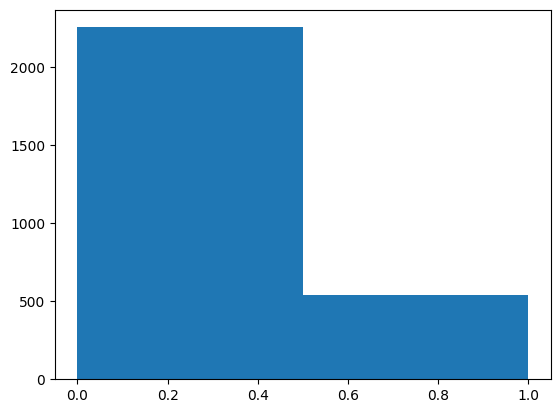

In [19]:
plt.hist(sup_labels,bins=2)

In [20]:
# calculate superpoint features
rgb_pt = torch.tensor(rgb)
intensity_pt = None
normals_pt = normals
verticality_pt = verticality[:,None]
linearity_pt = linearity[:,None]
planarity_pt = planarity[:,None]
scattering_pt = scattering[:,None]
sphericity_pt = sphericity[:,None]
elevation_pt = torch.as_tensor(elevation[:,None]).float()

# mean_pt_feat
rgb_sup = scatter_mean(rgb_pt, torch.as_tensor(sup_f,dtype=torch.int64),dim=0) if rgb_pt is not None else None
intensity_sup = scatter_mean(intensity_pt, torch.as_tensor(sup_f,dtype=torch.int64),dim=0) if intensity_pt is not None else None
normals_sup = scatter_mean(normals_pt, torch.as_tensor(sup_f,dtype=torch.int64),dim=0) if normals_pt is not None else None
verticality_sup = scatter_mean(verticality_pt, torch.as_tensor(sup_f,dtype=torch.int64),dim=0) if verticality_pt is not None else None
linearity_sup = scatter_mean(linearity_pt, torch.as_tensor(sup_f,dtype=torch.int64),dim=0) if linearity_pt is not None else None
planarity_sup = scatter_mean(planarity_pt, torch.as_tensor(sup_f,dtype=torch.int64),dim=0) if planarity_pt is not None else None
scattering_sup = scatter_mean(scattering_pt, torch.as_tensor(sup_f,dtype=torch.int64),dim=0) if scattering_pt is not None else None
sphericity_sup = scatter_mean(sphericity_pt, torch.as_tensor(sup_f,dtype=torch.int64),dim=0) if sphericity_pt is not None else None
elevation_sup = scatter_mean(elevation_pt, torch.as_tensor(sup_f,dtype=torch.int64),dim=0) if elevation_pt is not None else None

all_feats_sup = torch.concat([f for f in[rgb_sup,intensity_sup,normals_sup,verticality_sup,linearity_sup,planarity_sup,scattering_sup,sphericity_sup,elevation_sup] if f is not None],dim=1)

feat = scattering_sup
plotter4 = pv.Plotter(notebook=True)
pcd_poly_feat = pv.PolyData(pos)
pcd_poly_feat['sup_feat'] = feat[sup_f]
plotter4.add_mesh(pcd_poly_feat, scalars='sup_feat')
plotter4.show(jupyter_backend='trame')

Widget(value='<iframe src="http://localhost:63566/index.html?ui=P_0x22e9417b7a0_3&reconnect=auto" class="pyvis…

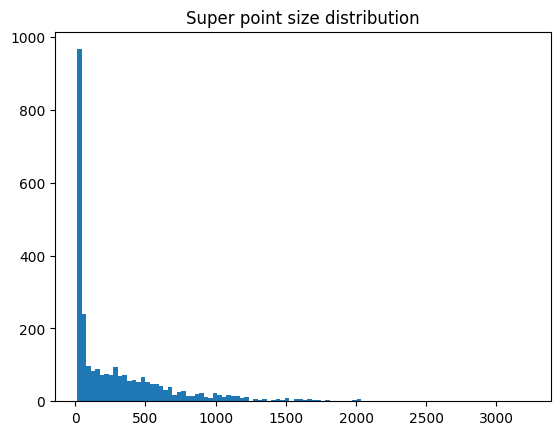

In [21]:
u,c = torch.unique(torch.as_tensor(sup_f,dtype=torch.int64), return_counts=True)
plt.hist(c, bins=100)
plt.title('Super point size distribution')
plt.show()

C:\Users\Hristo\AppData\Local\Temp\ipykernel_14864\1696189385.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


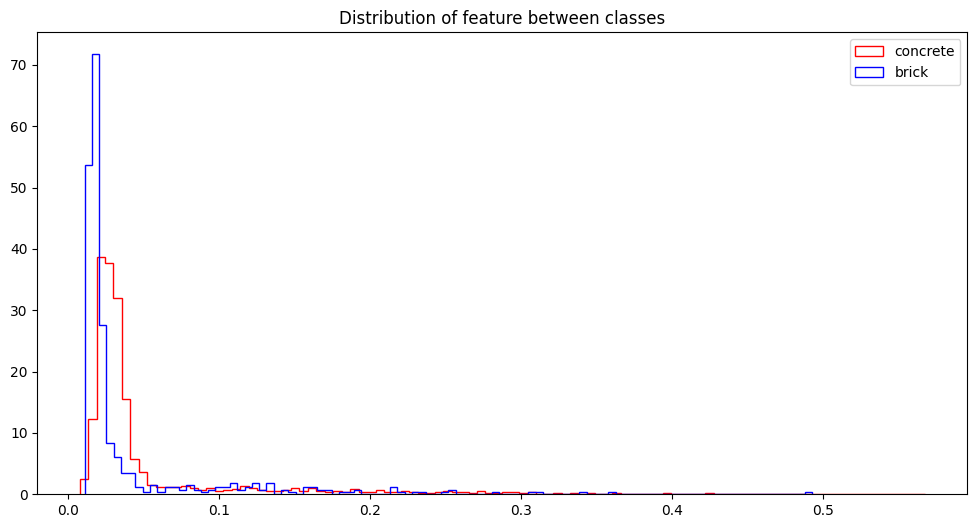

In [22]:
feat_0 = feat[sup_labels==0]
feat_1 = feat[sup_labels==1]

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.hist(feat_0[:],bins=100, edgecolor='red',histtype='step',density=True,label='concrete')
ax.hist(feat_1[:],bins=100, edgecolor='blue',histtype='step',density=True, label='brick')
ax.legend()
ax.set_title('Distribution of feature between classes')
fig.show()


# MMG Model

In [ ]:
# from sklearn.mixture import GaussianMixture
# import random
# print(all_feats_sup.shape)

# k = 500
# n_components = 10

# all_feats_sup_trans = all_feats_sup - all_feats_sup.mean(dim=0)
# all_feats_sup_trans /= all_feats_sup_trans.std(dim=0)

# model_fg = GaussianMixture(n_components=n_components, covariance_type='full')
# model_bg = GaussianMixture(n_components=n_components, covariance_type='full')


# mask_0 = torch.tensor([v.item() for v in random.choices(torch.nonzero(sup_labels==0),k=k)])
# mask_1 = torch.tensor([v.item() for v in random.choices(torch.nonzero(sup_labels==1),k=k)])


# model_fg.fit(all_feats_sup[mask_0].numpy())
# model_bg.fit(all_feats_sup[mask_1].numpy())


# score_fg = model_fg.predict(all_feats_sup_trans.numpy())
# score_bg = model_bg.predict(all_feats_sup_trans.numpy())

# plotter5 = pv.Plotter(notebook=True)
# pcd_poly_scores = pv.PolyData(pos)
# pcd_poly_scores['s'] = np.zeros((pos.shape[0],3),dtype=np.float32)
# pcd_poly_scores['s'] = np.concat([c[:,None] for c in [(score_bg/score_bg.max())[sup_f],np.zeros(pos.shape[0],dtype=float),np.zeros(pos.shape[0],dtype=float)]],axis=1)

# pcd_poly_scores['s'][torch.isin(torch.as_tensor(sup_f).long(),mask_0)] = [0,0,1]
# pcd_poly_scores['s'][torch.isin(torch.as_tensor(sup_f).long(),mask_1)] = [0,1,0]

# plotter5.add_mesh(pcd_poly_scores,scalars='s',rgb=True)
# plotter5.show()








In [ ]:
# ((score_bg > 0.5) == sup_labels).sum()/sup_labels.shape[0]

# MLP Model

In [30]:
import torch
from torch import nn

from typing import List

class MLP(nn.Module):
    def __init__(self,channels:List[int],dropout:List[float]|float|None = None):
        super().__init__()

        self.mlp = nn.Sequential(*[nn.Linear(channels[i], channels[i+1]) for i in range(len(channels) - 1)])
        if isinstance(dropout, float):
            self.dropout = nn.Dropout(dropout)
        elif isinstance(dropout, list):
            assert len(dropout) == len(channels)-1
            self.dropout = nn.ModuleList([nn.Dropout(p) for p in dropout])
        else:
            self.dropout = None
    def forward(self, x):
        for i, m in enumerate(self.mlp):
            x = m(x)
            if i < len(self.mlp) -1:
                x = nn.functional.relu(x)
            if self.dropout is not None:
                if isinstance(self.dropout, nn.ModuleList):
                    x = self.dropout[i](x)
                else:
                    x = self.dropout(x)
        x = torch.nn.functional.log_softmax(x,dim=1)
        return x
    def fit(self,
            x:torch.Tensor, 
            y:torch.Tensor,
            criterion = torch.nn.CrossEntropyLoss(),
            epochs:int=100,
            device='cuda',
            lr=0.01,
            weight_decay:float = 1e-4,
            optim:torch.optim.Optimizer|None=None,
            ):
        self.train()
        if optim is None:
            optim = torch.optim.Adam(
                self.parameters(),
                lr=lr,
                weight_decay=weight_decay
                )
        x = x.to(device=device)
        y = y.to(device=device)
        self.to(device=device)
        loss = torch.tensor(0)
        for epoch in range(1,epochs+1):
            optim.zero_grad()
            out = self(x)
            loss = criterion(out,y)
            loss.backward()
            optim.step()
        print(f"DEBUG fit MLP with loss={loss.detach().cpu().item():.3f}")
    def predict(self, x):
        self.eval()
        return self(x)



In [47]:
# import random

all_feats_sup_trans = all_feats_sup - all_feats_sup.mean(dim=0)
all_feats_sup_trans /= all_feats_sup_trans.std(dim=0)
sup_centroids = scatter_mean(torch.as_tensor(pos), torch.as_tensor(sup_f,dtype=torch.int64),dim=0)


# n_dims = all_feats_sup_trans.shape[1]
# models = {
#   "Logistic regression": MLP([n_dims,2]),  
# #   "1 hidden layer (64)": MLP([n_dims,64,2]),
# #   "1 hidden layer (64) + dropout(0.2)": MLP([n_dims,64,2],dropout=0.2)
# } 


# ks = [1,2,3,4,5,10,15,20]
# ks = [15]
# num_attempts = 1
# fig,ax = plt.subplots(1,1,figsize=(12,6))
# for mi, (model_name, model) in enumerate(models.items()):
#     all_accs = []
#     for attempt_i in range(num_attempts):
#         accs = []
#         for k in ks:
            

#             mask_fg = torch.tensor([v.item() for v in random.choices(torch.nonzero(sup_labels==0),k=k)])
#             mask_bg = torch.tensor([v.item() for v in random.choices(torch.nonzero(sup_labels==1),k=k)])

#             mask_train = torch.zeros(sup_labels.shape[0],dtype=torch.int64).bool()
#             mask_train[mask_fg] = True
#             mask_train[mask_bg] = True



#             train_feats = all_feats_sup_trans[mask_train]
#             train_y = sup_labels[mask_train]

#             model.fit(train_feats, train_y,epochs=1000)

#             pred = model.predict(all_feats_sup_trans.to(device='cuda')).detach().cpu().numpy()
#             pred = np.argmax(pred, axis=1)
#             acc = (sup_labels == pred).sum() / pred.shape[0]
#             accs.append(acc)
#         all_accs.append(accs)
#     all_accs = np.array(all_accs)
#     accs = np.mean(all_accs, axis=0)
#     accs_std = np.std(all_accs,axis=0)
#     color=index_to_color(mi)
#     ks_s = np.array(ks)
#     ax.errorbar(ks_s,accs,yerr= accs_std,fmt='o', capsize=5, label=model_name, color = color,linestyle='none')
#     ax.plot(ks_s,accs,color=color)
#     ax.fill_between(ks_s,accs-accs_std,accs+accs_std, color=color, alpha=0.2,)

# ax.set_xticks(ks)
# ax.legend()
# plt.show()











In [32]:
# y = torch.zeros(sup_f.shape[0], dtype = torch.int64)
# y[mask_fg]=1


# pred_viz = model.predict(all_feats_sup_trans.to(device='cuda')).detach().cpu().numpy()[:,1]
# pred_viz -= pred.min()
# pred_viz /= pred.max()
# plotter6 = pv.Plotter(notebook=True)
# pcd_poly_scores = pv.PolyData(pos)

# pcd_poly_scores['s'] = pred_viz[sup_f]

# # pcd_poly_scores['s'][torch.isin(torch.as_tensor(sup_f).long(),mask_0)] = [0,0,1]
# # pcd_poly_scores['s'][torch.isin(torch.as_tensor(sup_f).long(),mask_1)] = [0,1,0]

# plotter6.add_mesh(pcd_poly_scores,scalars='s',rgb=False)
# plotter6.show()

In [23]:
def calibrate_mrf(node_feats, cost_source, cost_sink, first_edg, adj_verts):
    d2 = []
    for u in range(V):
        for k in range(first_edg[u], first_edg[u+1]):
            v = adj_verts[k]
            d2.append(np.sum((node_feats[u] - node_feats[v])**2))
    d2 = np.array(d2)
    m = np.median(d2)

    beta = np.log(2)/m
    delta = np.abs(cost_source - cost_sink)
    lmbda = np.median(delta)

    return beta, lmbda

In [33]:
import maxflow
def solve_mincut(node_feats, cost_source, cost_sink, first_edg, adj_verts, lmbda, beta):
    
    V,F = node_feats.shape
    g = maxflow.Graph[float](V, adj_verts.size)
    g.add_nodes(V)
    # t-links
    for u in range(V):
        g.add_tedge(u, cost_source[u], cost_sink[u])

    # pairwise links
    for u in range(V):
        start, end = first_edg[u], first_edg[u+1]
        u_feat = node_feats[u]
        for idx in range(start,end):
            v = adj_verts[idx]
            v_feat = node_feats[v]
            diff = u_feat - v_feat
            w = lmbda * np.exp(-beta * (diff@diff))
            g.add_edge(u,v,w,w)
    # solve
    flow = g.maxflow()
    print(f"DEBUG solved mincut with {flow=}")


    # y = torch.zeros(sup_f.shape[0], dtype = torch.int64)
    # y[mask_fg]=1

    labels = np.array([g.get_segment(u) for u in range(V)])
    return labels


# constant picks

In [ ]:
import random
# ### CONFIG
config_k = 20 # picks per class

# initial mask (simulated picks)
mask_fg = torch.tensor([v.item() for v in random.choices(torch.nonzero(sup_labels==0),k=config_k)])
mask_bg = torch.tensor([v.item() for v in random.choices(torch.nonzero(sup_labels==1),k=config_k)])

mask_train = torch.zeros(sup_labels.shape[0],dtype=torch.int64).bool()
mask_train[mask_fg] = True
mask_train[mask_bg] = True

sup_centroids_fg = sup_centroids[mask_fg]
sup_centroids_bg = sup_centroids[mask_bg]



In [ ]:
# from torch_geometric.nn import fps


# sup_centroids_fg = fps(sup_centroids[sup_labels==0],ratio=(config_k / (sup_labels==0).sum()).item())
# sup_centroids_bg = fps(sup_centroids[sup_labels==1],ratio=(config_k / (sup_labels==1).sum()).item())




In [ ]:
# min-cut solution
import maxflow
import numpy as np

### CONFIG
config_epochs = 1000



# inputs
V,F = all_feats_sup_trans.shape
node_feats = all_feats_sup_trans.numpy()
node_feats_t = torch.as_tensor(node_feats)
model = MLP([node_feats.shape[1],64,2],dropout=0.2)





train_feats = all_feats_sup_trans[mask_train]
train_y = sup_labels[mask_train]

# grab graph info
first_edg = graph_f[0] # [V]
adj_verts = graph_f[1] # [E]

# solve
# iteration 0
model.fit(train_feats, train_y,epochs=config_epochs)
preds = model(node_feats_t.to(device='cuda')).detach().cpu().numpy()
print(f"Unary Accuracy: {((sup_labels.numpy() == np.argmax(preds, axis=1)).sum()/preds.shape[0]).item()*100:.3f}%")
cost_source     = - preds[:,1]
cost_sink       = - preds[:,0]


beta,lmbda = calibrate_mrf(node_feats, cost_source, cost_sink, first_edg, adj_verts)
labels = solve_mincut(node_feats, cost_source, cost_sink, first_edg, adj_verts, lmbda, beta)
print(f"Accuracy: {((sup_labels.numpy() == labels.astype(bool)).sum()/labels.shape[0]).item()*100:.3f}%")

# iteration 1
labels = torch.as_tensor(labels,dtype=torch.int64)
node_feats_t = all_feats_sup_trans
model.fit(node_feats_t, labels, epochs=config_epochs)
preds = model(node_feats_t.to(device='cuda')).detach().cpu().numpy()
cost_source     = - preds[:,1]
cost_sink       = - preds[:,0]
labels = solve_mincut(node_feats, cost_source, cost_sink, first_edg, adj_verts, lmbda, beta)
print(f"Accuracy: {((sup_labels.numpy() == labels.astype(bool)).sum()/labels.shape[0]).item()*100:.3f}%")

# iteration 2
labels = torch.as_tensor(labels,dtype=torch.int64)
node_feats_t = all_feats_sup_trans
model.fit(node_feats_t, labels, epochs=config_epochs)
preds = model(node_feats_t.to(device='cuda')).detach().cpu().numpy()
cost_source     = - preds[:,1]
cost_sink       = - preds[:,0]
labels = solve_mincut(node_feats, cost_source, cost_sink, first_edg, adj_verts, lmbda, beta)
print(f"Accuracy: {((sup_labels.numpy() == labels.astype(bool)).sum()/labels.shape[0]).item()*100:.3f}%")


# iteration 3
labels = torch.as_tensor(labels,dtype=torch.int64)
node_feats_t = all_feats_sup_trans
model.fit(node_feats_t, labels, epochs=config_epochs)
preds = model(node_feats_t.to(device='cuda')).detach().cpu().numpy()
cost_source     = - preds[:,1]
cost_sink       = - preds[:,0]
labels = solve_mincut(node_feats, cost_source, cost_sink, first_edg, adj_verts, lmbda, beta)
print(f"Accuracy: {((sup_labels.numpy() == labels.astype(bool)).sum()/labels.shape[0]).item()*100:.3f}%")


# iteration 4
labels = torch.as_tensor(labels,dtype=torch.int64)
node_feats_t = all_feats_sup_trans
model.fit(node_feats_t, labels, epochs=config_epochs)
preds = model(node_feats_t.to(device='cuda')).detach().cpu().numpy()
cost_source     = - preds[:,1]
cost_sink       = - preds[:,0]
labels = solve_mincut(node_feats, cost_source, cost_sink, first_edg, adj_verts, lmbda, beta)
print(f"Accuracy: {((sup_labels.numpy() == labels.astype(bool)).sum()/labels.shape[0]).item()*100:.3f}%")

# iteration 4
labels = torch.as_tensor(labels,dtype=torch.int64)
node_feats_t = all_feats_sup_trans
model.fit(node_feats_t, labels, epochs=config_epochs)
preds = model(node_feats_t.to(device='cuda')).detach().cpu().numpy()
cost_source     = - preds[:,1]
cost_sink       = - preds[:,0]
labels = solve_mincut(node_feats, cost_source, cost_sink, first_edg, adj_verts, lmbda, beta)
print(f"Accuracy: {((sup_labels.numpy() == labels.astype(bool)).sum()/labels.shape[0]).item()*100:.3f}%")





plotter7 = pv.Plotter(notebook=True)
pcd_poly_mincut = pv.PolyData(pos)

pcd_poly_mincut['s'] = labels[sup_f]


# pcd_poly_scores['s'][torch.isin(torch.as_tensor(sup_f).long(),mask_0)] = [0,0,1]
# pcd_poly_scores['s'][torch.isin(torch.as_tensor(sup_f).long(),mask_1)] = [0,1,0]

plotter7.add_mesh(pcd_poly_mincut,scalars='s',rgb=False,cmap=['#ae8484','#c7e881'],categories=True)

for centroid in sup_centroids_fg:
    sp = pv.Sphere(0.2,centroid.numpy())
    plotter7.add_mesh(sp, color='f01c1c')

for centroid in sup_centroids_bg:
    sp = pv.Sphere(0.2,centroid.numpy())
    plotter7.add_mesh(sp, color='#a8f209')

plotter7.show()
reset_camera_standard(plotter7)

In [ ]:
# min-cut solution
import maxflow
import random
import numpy as np

# informed picking
# initial mask

### CONFIG
config_init_k = 3 # picks per class
config_k_per_it = 1
num_iterations = 30


# initial mask (simulated picks)
mask_fg = torch.tensor(random.sample(torch.nonzero(sup_labels==0).tolist(),k=config_init_k))
mask_bg = torch.tensor(random.sample(torch.nonzero(sup_labels==1).tolist(),k=config_init_k))


mask_train = torch.zeros(sup_labels.shape[0],dtype=torch.int64).bool()
mask_train[mask_fg] = True
mask_train[mask_bg] = True


config_epochs = 1000



# inputs
V,F = all_feats_sup_trans.shape
node_feats = all_feats_sup_trans.numpy()
node_feats_t = torch.as_tensor(node_feats)
model = MLP([node_feats.shape[1],64,2],dropout=0.2)





train_feats = all_feats_sup_trans[mask_train]
train_y = sup_labels[mask_train]

# grab graph info
first_edg = graph_f[0] # [V]
adj_verts = graph_f[1] # [E]

# solve
# iteration 0



def fit_and_solve(model,train_feats, train_y,num_epochs,sup_labels,node_feats_t,first_edg,adj_verts):

    model.fit(train_feats, train_y,epochs=num_epochs)
    preds = model(node_feats_t.to(device='cuda')).detach().cpu().numpy()
    print(f"Unary Accuracy: {((sup_labels.numpy() == np.argmax(preds, axis=1)).sum()/preds.shape[0]).item()*100:.3f}%")
    cost_source     = - preds[:,1]
    cost_sink       = - preds[:,0]


    beta,lmbda = calibrate_mrf(node_feats, cost_source, cost_sink, first_edg, adj_verts)
    mc_preds = solve_mincut(node_feats, cost_source, cost_sink, first_edg, adj_verts, lmbda, beta)
    print(f"Accuracy: {((sup_labels.numpy() == mc_preds.astype(bool)).sum()/mc_preds.shape[0]).item()*100:.3f}%")
    

    return mc_preds, mc_preds == sup_labels.numpy()

# init solve
labels, correct = fit_and_solve(model,train_feats, train_y,config_epochs,sup_labels,node_feats_t,first_edg,adj_verts)
acc_best = 0
labels_best = None
for it in range(num_iterations):
    train_feats = all_feats_sup_trans[mask_train]
    train_y = sup_labels[mask_train]
    # update train mask from wrong classifications


    wrong_sup_idx = np.nonzero(~correct)[0]
    new_samples_fg = random.sample(wrong_sup_idx[sup_labels[wrong_sup_idx]==0].tolist(), k=config_k_per_it)
    new_samples_bg = random.sample(wrong_sup_idx[sup_labels[wrong_sup_idx]==1].tolist(), k=config_k_per_it)
    mask_train[new_samples_bg] = True
    mask_train[new_samples_fg] = True
    labels, correct = fit_and_solve(model,train_feats, train_y,config_epochs,sup_labels,node_feats_t,first_edg,adj_verts)
    acc_new = correct.mean()
    if acc_new > acc_best:
        acc_best = acc_new
        labels_best = labels
        print(f'>>>>>>> new best acc: {acc_best} <<<<<<<<<<<')
plotter8 = pv.Plotter(notebook=True)
pcd_poly_mincut = pv.PolyData(pos)

pcd_poly_mincut['s'] = labels[sup_f]


# pcd_poly_scores['s'][torch.isin(torch.as_tensor(sup_f).long(),mask_0)] = [0,0,1]
# pcd_poly_scores['s'][torch.isin(torch.as_tensor(sup_f).long(),mask_1)] = [0,1,0]

plotter8.add_mesh(pcd_poly_mincut,scalars='s',rgb=False,cmap=['#ae8484','#c7e881'],categories=True)
# update centroids to reflect mask
sup_centroids_fg = sup_centroids[torch.logical_and(mask_train, sup_labels==0)]
sup_centroids_bg = sup_centroids[torch.logical_and(mask_train, sup_labels==1)]

for centroid in sup_centroids_fg:
    sp = pv.Sphere(0.2,centroid.numpy())
    plotter8.add_mesh(sp, color='f01c1c')

for centroid in sup_centroids_bg:
    sp = pv.Sphere(0.2,centroid.numpy())
    plotter8.add_mesh(sp, color='#a8f209')

plotter8.show()
reset_camera_standard(plotter8)


# embeddings models

In [ ]:
import torch
from models.graph import SimpleModel, SPConvModel, PointNetEncoder, forwardstar_to_idx, SPConv
from utils.pointcloud import compute_geometric_feats
import random
import numpy as np



# config_model_fp = 'experiments/spconv_contrastive_L0-1.pth'
# config_model_fp = 'experiments/spconv_contrastive_L0-01.pth'
# config_model_fp = 'experiments/spconv_contrastive_L1-00.pth'
config_model_fp = 'experiments/simple_model.pth'
config_device = 'cuda'


model = torch.load(config_model_fp, weights_only=False)
model.eval().to(device=config_device)

# convert and direct edges
edge_idx = forwardstar_to_idx(first_edg, adj_verts)
edge_idx = torch.tensor(np.concat([edge_idx,edge_idx[[1,0],:]],axis=1),dtype=torch.int64)





gfeats_preembed = compute_geometric_feats(torch.as_tensor(pos).to(device=config_device), torch.as_tensor(edge_idx,dtype=torch.int64).to(device=config_device), feat_names=[
    'normals', 
    'verticality', 
    'linearity', 
    'planarity', 
    'scattering', 
])      

pfeats_preembed = np.concatenate([
    rgb,
    intensity[:,None],
    gfeats_preembed['normals'].cpu().numpy(), 
    gfeats_preembed['verticality'][:,None].cpu().numpy(), 
    gfeats_preembed['linearity'][:,None].cpu().numpy(), 
    gfeats_preembed['planarity'][:,None].cpu().numpy(), 
    gfeats_preembed['scattering'][:,None].cpu().numpy(), 
    pos[:,2][:,None],
    
],axis=1)

pfeats_preembed -= pfeats_preembed.mean(axis=0)
pfeats_preembed /= (np.std(pfeats_preembed, axis=0) + 1e-6)


# forward pass embedding model
if isinstance(model, SimpleModel):
    z, _ = model(
        torch.as_tensor(pos,dtype=torch.float32).to(device=config_device),
        torch.as_tensor(pfeats_preembed,dtype=torch.float32).to(device=config_device),
        torch.as_tensor(sup_f,dtype=torch.int64).to(device=config_device),
        )
elif isinstance(model, SPConvModel):
    z, _ = model(
        torch.as_tensor(pos,dtype=torch.float32).to(device=config_device),
        torch.as_tensor(pfeats_preembed,dtype=torch.float32).to(device=config_device),
        torch.as_tensor(sup_f,dtype=torch.int64).to(device=config_device),
        torch.as_tensor(edge_idx,dtype=torch.int64).to(device=config_device),
        )
else:
    raise NotImplementedError(f"No procedure implemented for {model.__class__.__name__}")

z = z.detach().cpu()
sup_feat = scatter_mean(torch.as_tensor(pfeats_preembed), torch.as_tensor(sup_f,dtype=torch.int64),dim=0)
total_feat = torch.concat([sup_feat, z],dim=1)
total_feat -= total_feat.mean(dim=0)
total_feat /= (torch.std(total_feat) + 1e-6)

# z = z.detach().cpu()
# z -= z.mean()
# z  /= torch.std(z) + 1e-6

############################################
# interactive seg on calculated embeddings #
############################################

# min-cut solution
import maxflow
import numpy as np

# informed picking
# initial mask

### CONFIG
config_init_k = 3 # picks per class
config_k_per_it = 1
num_iterations = 30
config_epochs = 1000

# initial mask (simulated picks)
mask_fg = torch.tensor(random.sample(torch.nonzero(sup_labels==0).tolist(),k=config_init_k))
mask_bg = torch.tensor(random.sample(torch.nonzero(sup_labels==1).tolist(),k=config_init_k))


mask_train = torch.zeros(sup_labels.shape[0],dtype=torch.int64).bool()
mask_train[mask_fg] = True
mask_train[mask_bg] = True

# inputs
V,F = total_feat.shape
node_feats = total_feat.numpy()
node_feats_t = torch.as_tensor(node_feats)
model = MLP([node_feats.shape[1],64,2],dropout=0.5)




train_feats = total_feat[mask_train]
train_y = sup_labels[mask_train]

# grab graph info
first_edg = graph_f[0] # [V]
adj_verts = graph_f[1] # [E]

# solve
# iteration 0




# init solve
labels, correct = fit_and_solve(model,train_feats, train_y,config_epochs,sup_labels,node_feats_t,first_edg,adj_verts)

for it in range(num_iterations):
    train_feats = total_feat[mask_train]
    train_y = sup_labels[mask_train]
    # update train mask from wrong classifications


    wrong_sup_idx = np.nonzero(~correct)[0]
    new_samples_fg = random.sample(wrong_sup_idx[sup_labels[wrong_sup_idx]==0].tolist(), k=config_k_per_it)
    new_samples_bg = random.sample(wrong_sup_idx[sup_labels[wrong_sup_idx]==1].tolist(), k=config_k_per_it)
    mask_train[new_samples_bg] = True
    mask_train[new_samples_fg] = True
    labels, correct = fit_and_solve(model,train_feats, train_y,config_epochs,sup_labels,node_feats_t,first_edg,adj_verts)
    
plotter9 = pv.Plotter(notebook=True)
pcd_poly_mincut_z = pv.PolyData(pos)

pcd_poly_mincut_z['s'] = labels[sup_f]


# pcd_poly_scores['s'][torch.isin(torch.as_tensor(sup_f).long(),mask_0)] = [0,0,1]
# pcd_poly_scores['s'][torch.isin(torch.as_tensor(sup_f).long(),mask_1)] = [0,1,0]

plotter9.add_mesh(pcd_poly_mincut_z,scalars='s',rgb=False,cmap=['#ae8484','#c7e881'],categories=True)
# update centroids to reflect mask
sup_centroids_fg = sup_centroids[torch.logical_and(mask_train, sup_labels==0)]
sup_centroids_bg = sup_centroids[torch.logical_and(mask_train, sup_labels==1)]

for centroid in sup_centroids_fg:
    sp = pv.Sphere(0.2,centroid.numpy())
    plotter9.add_mesh(sp, color='f01c1c')

for centroid in sup_centroids_bg:
    sp = pv.Sphere(0.2,centroid.numpy())
    plotter9.add_mesh(sp, color='#a8f209')

plotter9.show()
reset_camera_standard(plotter9)

# Simple HC features + reggrow (Composite model)

In [25]:
from segmentation.reggrow_params import *
from segmentation.reggrow.build.lib import reggrow as rg

rg_pcd = rg.PointCloud(pos, None)
rg_params = ReggrowParams()
rg_params.build_params.epsilon=0.09
graph = rg.region_graph(rg_pcd,1,1,1, **rg_params.build_params.to_dict())

In [34]:
u_reg_ids = np.unique(graph['region_assignment'])
reg_ids = graph['region_assignment']

if -1 in u_reg_ids:
    u_reg_ids += 1
    reg_ids += 1
    

# calculate geometry on each region
evals, evecs = scatter_eigendecomposition(torch.as_tensor(pos, dtype=torch.float32), torch.as_tensor(reg_ids, dtype=torch.int64),reg_ids.max()+1)

# different feature flavors
eps = 1e-5
l1, l2, l3 = evals[:,0], evals[:,1], evals[:,2]
normals = evecs[:,:,0]
verticality = normals[:,2].abs()
linearity  = (l3 - l2) / (l3 + eps)
planarity  = (l2 - l1) / (l3 + eps)
scattering = l1 / (l3 + eps)
sum_evals = l1 + l2 + l3 + eps
sphericity = l1 / sum_evals    

reg_geom_feats = torch.cat([
    normals, verticality[:,None], linearity[:,None], planarity[:,None], scattering[:,None], sum_evals[:,None], sphericity[:,None],
],dim=1)
# expand to point cloud size
reg_geom_feats = reg_geom_feats[reg_ids]
# average for every superpoint
reg_geom_feats = scatter_mean(reg_geom_feats, torch.as_tensor(sup_f, dtype=torch.int64),dim=0)
reg_geom_feats.shape

torch.Size([2796, 9])

In [35]:
reg_ids_oh = torch.as_tensor(np.eye(reg_ids.max()+1)[reg_ids])
reg_ids_oh = scatter_mean(reg_ids_oh, torch.as_tensor(sup_f, dtype=torch.int64),dim=0)
reg_ids_oh.shape

torch.Size([2796, 13])

In [36]:
# calculate geometry of each superpoint
_, sup_f_inv = np.unique(sup_f, return_inverse=True)
evals, evecs = scatter_eigendecomposition(torch.as_tensor(pos, dtype=torch.float32), torch.as_tensor(sup_f, dtype=torch.int64),sup_f_inv.max()+1)

# different feature flavors
eps = 1e-5
l1, l2, l3 = evals[:,0], evals[:,1], evals[:,2]
normals = evecs[:,:,0]
verticality = normals[:,2].abs()
linearity  = (l3 - l2) / (l3 + eps)
planarity  = (l2 - l1) / (l3 + eps)
scattering = l1 / (l3 + eps)
sum_evals = l1 + l2 + l3 + eps
sphericity = l1 / sum_evals    

sup_geom_feats = torch.cat([
    normals, verticality[:,None], linearity[:,None], planarity[:,None], scattering[:,None], sum_evals[:,None], sphericity[:,None],
],dim=1)
# expand to point cloud size
sup_geom_feats


tensor([[ 2.1521e-01,  5.6352e-01,  7.9758e-01,  ..., -4.2824e-03,
          4.7116e-02, -2.7332e-03],
        [ 2.1273e-01,  4.8188e-01,  8.5002e-01,  ...,  1.4336e-02,
          1.1969e-03,  1.1965e-02],
        [-1.9681e-01, -5.2406e-01, -8.2863e-01,  ...,  1.9221e-03,
          2.1726e-03,  1.1417e-03],
        ...,
        [ 1.9548e-01,  4.3696e-01,  8.7798e-01,  ...,  3.0451e-03,
          1.3563e-03,  2.7144e-03],
        [-3.3103e-01, -9.0981e-01, -2.5031e-01,  ...,  5.8447e-02,
          3.1778e-03,  4.6684e-02],
        [ 2.3950e-01, -6.1362e-01,  7.5240e-01,  ...,  5.2910e-02,
          8.3936e-04,  4.2387e-02]])

In [37]:
mlp_reg_lut = MLP([reg_ids_oh.shape[1],32])
mlp_reg_geom = MLP([9,32], dropout=0.2)
mlp_sup_geom = MLP([9,32], dropout=0.2)
mlp_pts_geom = MLP([12,32], dropout=0.2)

class CompositeModel(nn.Module):
    def __init__(self,
        mlp_reg_lut:nn.Module|None = None,
        mlp_reg_geom:nn.Module|None = None,
        mlp_sup_geom:nn.Module|None = None,
        mlp_pts_geom:nn.Module|None = None,
        ):
        super().__init__()
        self.mlp_reg_lut    = mlp_reg_lut
        self.mlp_reg_geom   = mlp_reg_geom
        self.mlp_sup_geom   = mlp_sup_geom
        self.mlp_pts_geom   = mlp_pts_geom
        
        self.mlp_unary = MLP([32,2], dropout=2)
        
    def forward(self,x:Dict[str, torch.Tensor]
        # reg_lut:torch.Tensor,
        # reg_geom:torch.Tensor,
        # sup_geom:torch.Tensor,
        # pts_geom:torch.Tensor,
        ):
        
        out_mlp_reg_lut    = self.mlp_reg_lut(x['reg_lut'])      if self.mlp_reg_lut    is not None else None
        out_mlp_reg_geom   = self.mlp_reg_geom(x['reg_geom'])    if self.mlp_reg_geom   is not None else None
        out_mlp_sup_geom   = self.mlp_sup_geom(x['sup_geom'])    if self.mlp_sup_geom   is not None else None
        out_mlp_pts_geom   = self.mlp_pts_geom(x['pts_geom'])    if self.mlp_pts_geom   is not None else None

        embeddings = [e for e in [out_mlp_reg_lut, out_mlp_reg_geom, out_mlp_sup_geom, out_mlp_pts_geom] if e is not None]
        embeddings = torch.stack(embeddings,dim=0).mean(dim=0)
        
        unary = self.mlp_unary(embeddings)
        return unary
    
    def fit(self,
            x:Dict[str, torch.Tensor], 
            y:torch.Tensor,
            criterion = torch.nn.CrossEntropyLoss(),
            epochs:int=100,
            device='cuda',
            lr=0.01,
            weight_decay:float = 1e-4,
            optim:torch.optim.Optimizer|None=None,
            ):
        self.train()
        if optim is None:
            optim = torch.optim.Adam(
                self.parameters(),
                lr=lr,
                weight_decay=weight_decay
                )

        y = y.to(device=device)
        self.to(device=device)
        loss = torch.tensor(0)
        for epoch in range(1,epochs+1):
            optim.zero_grad()
            out = self(x)
            loss = criterion(out,y)
            loss.backward()
            optim.step()
        print(f"DEBUG fit MLP with loss={loss.detach().cpu().item():.3f}")
    def predict(self, x):
        self.eval()
        return self(x)
    




In [38]:
print(reg_ids_oh.shape)
print(reg_geom_feats.shape)
print(sup_geom_feats.shape)
print(all_feats_sup_trans.shape)

torch.Size([2796, 13])
torch.Size([2796, 9])
torch.Size([2796, 9])
torch.Size([2796, 12])


In [40]:
# out = model(
#     reg_lut = reg_ids_oh.to(config_device,dtype=torch.float32),
#     reg_geom = reg_geom_feats.to(config_device,dtype=torch.float32),
#     sup_geom = sup_geom_feats.to(config_device,dtype=torch.float32),
#     pts_geom = all_feats_sup_trans.to(config_device,dtype=torch.float32),
# )
config_device='cuda'
in_all = dict(
    reg_lut = reg_ids_oh.to(config_device,dtype=torch.float32),
    reg_geom = reg_geom_feats.to(config_device,dtype=torch.float32),
    sup_geom = sup_geom_feats.to(config_device,dtype=torch.float32),
    pts_geom = all_feats_sup_trans.to(config_device,dtype=torch.float32),
)

In [ ]:
for n,v in in_all.items():
    print(n, v.shape)
    



<text color="red">asd</text>

In [105]:
# init results container
results = dict()



In [64]:
# min-cut solution
import maxflow
import random
import numpy as np

# informed picking
# initial mask

### CONFIG
config_init_k = 3 # picks per class
config_k_per_it = 2
config_epochs = 1000
num_iterations = 20
num_experiments = 10

# inputs
V,F = all_feats_sup_trans.shape


node_names = [ 
    # 'reg_geom',
    'sup_geom',
    'pts_geom',
]
exp_name = 'sup_geom+pts_geom+lut'
exp_name = 'sup_geom+pts_geom'
exp_name = 'pts_geom'
exp_name = 'sup_geom'

exp_name = 'sup_geom+pts_geom+lut'
exp_name = 'sup_geom+pts_geom'
exp_name = 'pts_geom'
exp_name = 'sup_geom'

results["+".join(node_names)] = list()

for experiment_i in range(num_experiments):
    results["+".join(node_names)].append(dict(
        iou=list(),
        acc=list()
    ))

    # initial mask (simulated picks)
    mask_fg = torch.tensor(random.sample(torch.nonzero(sup_labels==0).tolist(),k=config_init_k))
    mask_bg = torch.tensor(random.sample(torch.nonzero(sup_labels==1).tolist(),k=config_init_k))


    mask_train = torch.zeros(sup_labels.shape[0],dtype=torch.int64).bool()
    mask_train[mask_fg] = True
    mask_train[mask_bg] = True






    node_feats_t = torch.concat([v for k,v in in_all.items() if k in node_names],dim=-1)
    node_feats = node_feats_t.detach().cpu().numpy()
            
    model = CompositeModel(
        mlp_reg_lut = mlp_reg_lut, 
        # mlp_reg_geom = mlp_reg_geom,    
        mlp_sup_geom = mlp_sup_geom,    
        mlp_pts_geom = mlp_pts_geom,    
    ).to(config_device)
    enforce_region_majority_voting = False




    # filter initial features and labels
    train_feats = {k:v[mask_train] for k, v in in_all.items()}
    train_y = sup_labels[mask_train]

    # grab graph info
    first_edg = graph_f[0] # [V]
    adj_verts = graph_f[1] # [E]

    # solve
    # iteration 0


    # define iteration
    def fit_and_solve(model,train_feats, train_y, num_epochs, sup_labels, node_feats_t, first_edg, adj_verts):

        model.fit(train_feats, train_y,epochs=num_epochs)
        preds = model(in_all).detach().cpu().numpy()
        print(f"Unary Accuracy: {((sup_labels.numpy() == np.argmax(preds, axis=1)).sum()/preds.shape[0]).item()*100:.3f}%")
        cost_source     = - preds[:,1]
        cost_sink       = - preds[:,0]

        beta,lmbda = calibrate_mrf(node_feats, cost_source, cost_sink, first_edg, adj_verts)
        mc_preds = solve_mincut(node_feats, cost_source, cost_sink, first_edg, adj_verts, lmbda*1, beta*1)
        if enforce_region_majority_voting:
            mc_preds = np.eye(2)[mc_preds]
            mc_preds = mc_preds[sup_f]
            mc_preds = scatter_mean(torch.as_tensor(mc_preds,dtype=torch.float32), torch.as_tensor(reg_ids,dtype=torch.int64), dim=0)
            mc_preds = np.eye(2)[torch.argmax(mc_preds, dim=1)[reg_ids]]
            mc_preds = scatter_mean(torch.as_tensor(mc_preds,dtype=torch.float32), torch.as_tensor(sup_f,dtype=torch.int64), dim=0)
            mc_preds = torch.argmax(mc_preds, dim=1).cpu().numpy()
            
            
        acc = ((sup_labels.numpy() == mc_preds.astype(bool)).mean()).item()
        print(f"Accuracy: {acc*100:.3f}%")
        y_true = sup_labels.numpy().astype(bool)
        y_pred = mc_preds.astype(bool)

        intersection = np.logical_and(y_true, y_pred).sum()
        union        = np.logical_or(y_true,  y_pred).sum()
        iou = intersection / union if union > 0 else 0.0

        print(f"IoU: {iou*100:.3f}%")
        results["+".join(node_names)][-1]['iou'].append(iou)
        results["+".join(node_names)][-1]['acc'].append(acc)
        

        return mc_preds, mc_preds == sup_labels.numpy()

    # init solve
    labels, correct = fit_and_solve(model,train_feats, train_y,config_epochs,sup_labels,node_feats_t,first_edg,adj_verts)
    acc_best = 0
    labels_best = None
    for it in range(num_iterations):



        # update train mask from wrong classifications
        wrong_sup_idx = np.nonzero(~correct)[0]
        try:
            new_samples_fg = random.sample(wrong_sup_idx[sup_labels[wrong_sup_idx]==0].tolist(), k=config_k_per_it)
            new_samples_bg = random.sample(wrong_sup_idx[sup_labels[wrong_sup_idx]==1].tolist(), k=config_k_per_it)
        except ValueError as e:
            print(f"no more samples: {e}")
            continue
        mask_train[new_samples_bg] = True
        mask_train[new_samples_fg] = True
        
        # mask features
        train_feats = {k:v[mask_train] for k, v in in_all.items()}
        train_y = sup_labels[mask_train]
        
        # run iteration
        labels, correct = fit_and_solve(model,train_feats, train_y, config_epochs, sup_labels, node_feats_t, first_edg, adj_verts)
        # report metrics
        acc_new = correct.mean()
        if acc_new > acc_best:
            acc_best = acc_new
            labels_best = labels
            print(f'>>>>>>> new best acc: {acc_best} <<<<<<<<<<<')
            
            
            
            
    # plot results
    plotter10 = pv.Plotter(notebook=True)
    pcd_poly_mincut = pv.PolyData(pos)

    pcd_poly_mincut['s'] = labels_best[sup_f]



plotter10.add_mesh(pcd_poly_mincut,scalars='s',rgb=False,cmap=['#ae8484','#c7e881'],categories=True)
# update centroids to reflect mask
sup_centroids_fg = sup_centroids[torch.logical_and(mask_train, sup_labels==0)]
sup_centroids_bg = sup_centroids[torch.logical_and(mask_train, sup_labels==1)]

for centroid in sup_centroids_fg:
    sp = pv.Sphere(0.2,centroid.numpy())
    plotter10.add_mesh(sp, color='f01c1c')

for centroid in sup_centroids_bg:
    sp = pv.Sphere(0.2,centroid.numpy())
    plotter10.add_mesh(sp, color='#a8f209')

plotter10.show()
reset_camera_standard(plotter10)


DEBUG fit MLP with loss=0.002
Unary Accuracy: 66.631%
DEBUG solved mincut with flow=1367.587897134794
Accuracy: 72.568%
IoU: 32.124%
DEBUG fit MLP with loss=0.002
Unary Accuracy: 73.712%
DEBUG solved mincut with flow=2245.7546333377004
Accuracy: 77.933%
IoU: 36.783%
>>>>>>> new best acc: 0.7793276108726752 <<<<<<<<<<<
DEBUG fit MLP with loss=0.008
Unary Accuracy: 81.938%
DEBUG solved mincut with flow=1916.940392724153
Accuracy: 82.403%
IoU: 45.028%
>>>>>>> new best acc: 0.8240343347639485 <<<<<<<<<<<
DEBUG fit MLP with loss=0.006
Unary Accuracy: 76.860%
DEBUG solved mincut with flow=1865.9138852482204
Accuracy: 75.358%
IoU: 27.244%
DEBUG fit MLP with loss=0.021
Unary Accuracy: 80.258%
DEBUG solved mincut with flow=2624.034619343682
Accuracy: 81.903%
IoU: 45.533%
DEBUG fit MLP with loss=0.030
Unary Accuracy: 79.185%
DEBUG solved mincut with flow=2415.7467972648537
Accuracy: 87.840%
IoU: 57.393%
>>>>>>> new best acc: 0.8783977110157367 <<<<<<<<<<<
DEBUG fit MLP with loss=0.045
Unary Accu

Widget(value='<iframe src="http://localhost:63566/index.html?ui=P_0x22ed5ee1790_20&reconnect=auto" class="pyvi…

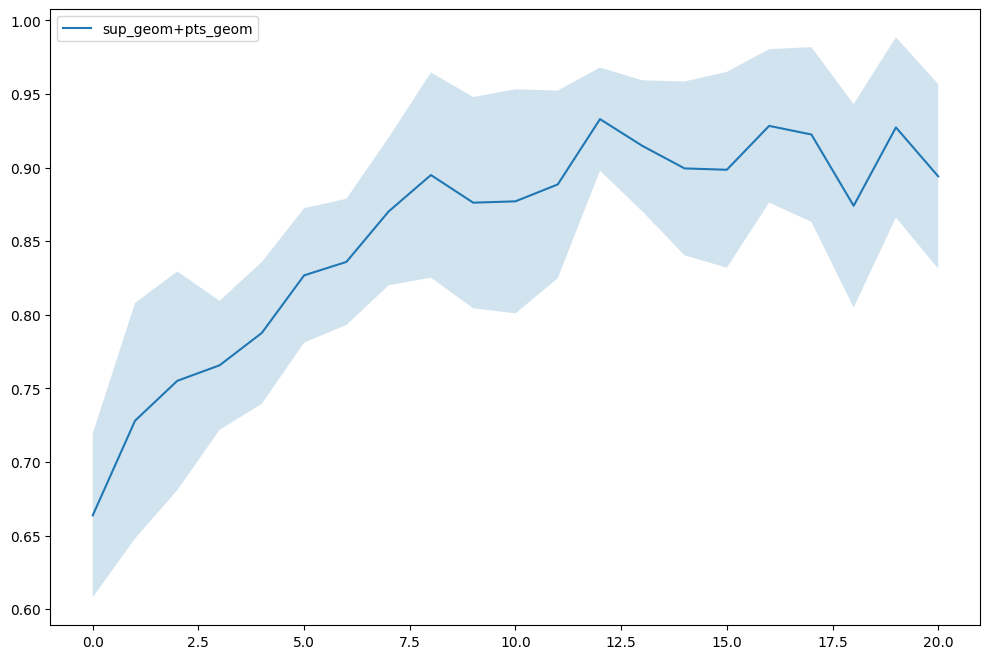

In [104]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
for ename, eres in results.items():
    ious = []
    accs = []
    for i in  range(len(eres)):
        if len(eres[i]['iou']) != num_iterations+1:
            continue
        ious.append(eres[i]['iou'])
        accs.append(eres[i]['acc'])
    accs = np.array(accs)
    plt.plot(range(accs.shape[1]),accs.mean(0), label=ename)
    plt.fill_between(range(accs.shape[1]),accs.mean(0)-accs.std(0),accs.mean(0)+accs.std(0),alpha=0.2)
plt.legend()